split data for every zone
===


In [45]:
import numpy as np
from numpy import genfromtxt
from learning_model import *
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
from array import array
from keras.utils import to_categorical
from keras.utils import np_utils
#from ann_visualizer.visualize import ann_viz
import config
import pandas as pd


In [3]:
#read the zone in every points on field(need to change below because pci need to be predict result and add zone)
pci_result_zone = np.genfromtxt('pci_result_zone.csv', delimiter=',')
print (pci_result_zone)
#read the raw data 
train_part_test = np.genfromtxt('set3_part_train.csv', delimiter=',')
pixel_pos = np.genfromtxt('pixel_pos.csv', delimiter=',')
data_test = np.genfromtxt('rem_test.csv', delimiter=',')
print (train_part_test)
print (data_test)
print (pixel_pos[1:,:])

[[  0.   0.  39.   1.]
 [  1.   0.  39.   1.]
 [  2.   0.  39.   1.]
 ...
 [102.  26.  42.   5.]
 [103.  26.  42.   5.]
 [104.  26.  42.   5.]]
[[   6.9175     12.3145     39.       -116.585714   61.29802     4.      ]
 [   6.9745     14.566      39.       -119.691304   61.273117    4.      ]
 [   7.147      16.696      37.       -115.         17.578927    1.      ]
 ...
 [ 101.974      15.3625     42.        -75.121791    5.878786    6.      ]
 [ 102.1315     16.9        42.        -69.618325    4.374928    6.      ]
 [ 102.283      18.2005     42.        -69.256658    3.139806    6.      ]]
[[  17.1775    5.4145   37.      -88.3   ]
 [  87.841    19.159    41.      -94.1   ]
 [  69.499     6.58     39.     -100.8   ]
 ...
 [  49.834    16.6825   38.      -74.9   ]
 [  57.4735   23.3665   38.      -93.6   ]
 [  52.0255   23.623    38.      -87.3   ]]
[[  0.   0.]
 [  1.   0.]
 [  2.   0.]
 ...
 [102.  26.]
 [103.  26.]
 [104.  26.]]


In [4]:
def convert_location_data(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
    
    lng = a * x - b * y * (-1) + c - 4
    lat = a * y * (-1) + b * x + d - 0.5
    
    
    return lng, lat

In [5]:
def convert_location_data_temp(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
    
    lng = x
    lat = y
    return lng, lat

In [6]:
train_part_test[:,0],train_part_test[:,1] = convert_location_data_temp(train_part_test[:,0],train_part_test[:,1])
print (train_part_test)
train_part_test[:,0] = np.around(train_part_test[:,0])
train_part_test[:,1] = np.around(train_part_test[:,1])
data_test[:,0] = np.around(data_test[:,0])
data_test[:,1] = np.around(data_test[:,1])
print (train_part_test)
print (data_test)


[[   6.9175     12.3145     39.       -116.585714   61.29802     4.      ]
 [   6.9745     14.566      39.       -119.691304   61.273117    4.      ]
 [   7.147      16.696      37.       -115.         17.578927    1.      ]
 ...
 [ 101.974      15.3625     42.        -75.121791    5.878786    6.      ]
 [ 102.1315     16.9        42.        -69.618325    4.374928    6.      ]
 [ 102.283      18.2005     42.        -69.256658    3.139806    6.      ]]
[[   7.         12.         39.       -116.585714   61.29802     4.      ]
 [   7.         15.         39.       -119.691304   61.273117    4.      ]
 [   7.         17.         37.       -115.         17.578927    1.      ]
 ...
 [ 102.         15.         42.        -75.121791    5.878786    6.      ]
 [ 102.         17.         42.        -69.618325    4.374928    6.      ]
 [ 102.         18.         42.        -69.256658    3.139806    6.      ]]
[[  17.     5.    37.   -88.3]
 [  88.    19.    41.   -94.1]
 [  69.     7.    39.  -10

PCI training
===

In [7]:
X = train_part_test[:,0:2]
y = train_part_test[:,2]
modelClassifier = KNeighborsClassifier(n_neighbors=3)
pci_pred = modelClassifier.fit(X, y).predict(data_test[:,0:2])
print(pci_pred)
n_accuracy = 0
for i in range(len(pci_pred)):
    if pci_pred[i] == data_test[i,2]: 
        n_accuracy = n_accuracy+1
print ("n_accuracy_pci==",n_accuracy)
print ("len(pci_pred)==",len(pci_pred))
acc = n_accuracy/(len(pci_pred))
print('pci accuracy: ',acc )

[37. 41. 39. ... 38. 38. 38.]
n_accuracy_pci== 4729
len(pci_pred)== 5691
pci accuracy:  0.8309611667545247


Predict pci and plot pci map
===

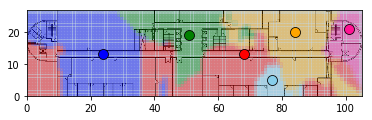

In [8]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
output = modelClassifier.predict(pixel_pos[1:,:])
#print(output)
#np.savetxt('output.csv', output, delimiter=',', fmt='%f')
pci = []
pci_input =  [37, 38, 39, 40, 41, 42, 120, 151, 154, 1, 62]
pci_config = np.array(pci_input)
f = open('./result_pci/pci_result.csv', 'w') #write the pci result into file
f.write('x,y,pci,\n')
#z = np.reshape(output, (y_resolution, x_resolution))
#z[:] = map(list,zip(*z[::-1]))
#z = np.genfromtxt('z.csv', delimiter=',')
#z_pred = np.hstack((xy, pci_map_pred))
#pci_pred = output.reshape(27,105)
z = np.reshape(output, (y_resolution, x_resolution))
#np.savetxt('z.csv', z, delimiter=',', fmt='%f')
for j in range(y_resolution):
        for i in range(x_resolution) : 
            pci = z[j][i]
            if pci == 37 :#37
                #pci_real = pci_config[0] 
                plt.plot(round(i), round(j), color='blue', marker = 's', markersize=5, alpha=.1)
            elif pci == 38 :#38
                #pci_real = pci_config[1]
                plt.plot(round(i), round(j), color='green', marker = 's', markersize=5, alpha=.1 )
            elif pci == 39 :#39
                #pci_real = pci_config[2]
                plt.plot(round(i), round(j), color='red', marker = 's', markersize=5, alpha=.1 )
            elif pci == 40:#40
                #pci_real = pci_config[3]
                plt.plot(round(i), round(j), color='skyblue', marker = 's', markersize=5, alpha=.1)
            elif pci == 41:#41
                #pci_real = pci_config[4]
                plt.plot(round(i), round(j), color='orange', marker = 's', markersize=5, alpha=.1)
            elif pci == 42:#42
                #pci_real = pci_config[5]
                plt.plot(round(i), round(j), color='deeppink', marker = 's', markersize=5, alpha=.1)
            elif pci == 120:#120
                #pci_real = pci_config[6]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 151:#151
                #pci_real = pci_config[7]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 154:#154
                #pci_real = pci_config[8]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            else :                 
                pci_real = -1
                plt.plot(round(i), round(j), color='white', marker = 's', markersize=5, alpha=.1 )
            result = str(i) + ',' + str(j) + ',' + str(pci) +',' + '\n'
            f.write(result)  # python will convert \n to os.linesep

f.close()  # you can omit in most cases as the destructor will call it
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
x, y = convert_location_data (260,215) #37
plt.plot(round(abs(x)), round(abs(y)), color='blue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

#SC1 (199, 151)
#x, y = convert_location_data (199, 868)
x, y = convert_location_data (480, 158) #38
plt.plot(round(abs(x)), round(abs(y)), color='green', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (630, 210) #39
plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='purple', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (710, 275) #40
plt.plot(round(abs(x)), round(abs(y)), color='skyblue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (765, 145) #41
plt.plot(round(abs(x)), round(abs(y)), color='orange', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

x, y = convert_location_data (908, 130) #42
plt.plot(round(abs(x)), round(abs(y)), color='deeppink', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
plt.savefig('test', dpi=200)

Mutiple zone to train model then save to file
===

In [25]:
pci_result_zone = np.genfromtxt('./result_pci/pci_result.csv', delimiter=',')
pci_result_zone = np.delete(pci_result_zone,0,axis=0)
print (pci_result_zone)


[[  0.   0.  39.  nan]
 [  1.   0.  39.  nan]
 [  2.   0.  39.  nan]
 ...
 [102.  26.  42.  nan]
 [103.  26.  42.  nan]
 [104.  26.  42.  nan]]


In [32]:
for i in range(1,7):
    #print(i)
    zone = np.array([])
    zone = np.where(train_part_test[:,5] == i)
    #print(train_part_test[zone[0],:])
    X = train_part_test[zone[0],0:3]
    y = train_part_test[zone[0],3]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    model = KNeighborsRegressor(n_neighbors=3)
    model.fit(X_train, y_train)
    filename = 'finalized_model_' + str(i) +'-' + '.sav'
    pickle.dump(model, open(filename, 'wb'))
    y_pred = model.predict(X_test)
    #print(pci_result_zone[:,2])
    zone_allpoint = np.where(pci_result_zone[:,2] == i+36)
    #print (len(zone_allpoint))
    predict_zone = model.predict(pci_result_zone[zone_allpoint[0],0:3])
    print(zone_allpoint[0]+1)
    print(len(predict_zone))
    #predict_zone_every = np.append(pci_result_zone[zone_allpoint[0],0:3],predict_zone)
    name = './zone_result/zone_predict_' + str(i) +'.csv'
    df_loc = pd.DataFrame(pci_result_zone[zone_allpoint[0],0:3],columns=['x','y','pci'])
    df_rsrp = pd.DataFrame(predict_zone,columns=['rsrp'])
    df_result = pd.concat([df_loc,df_rsrp],axis=1)
    #print(str(i)+"==="+"df==",df)
    df_result.to_csv(name,index=False,columns=['x','y','pci','rsrp'])
    #df_result = []
    
    #np.savetxt(name, predict_zone_every, delimiter=',', fmt='%f')
    #print("X_test",X_test)
    #print("y_pred",y_pred)
    #print("predict_zone",predict_zone)
    print("[MSE]==",mean_squared_error(y_test, y_pred))
    print("[RMSE]==",mean_squared_error(y_test, y_pred)**(0.5))
    loaded_model = pickle.load(open(filename, 'rb'))
df1 = pd.read_csv('./zone_result/zone_predict_1.csv')
df2 = pd.read_csv('./zone_result/zone_predict_2.csv')  
df3 = pd.read_csv('./zone_result/zone_predict_3.csv')  
df4 = pd.read_csv('./zone_result/zone_predict_4.csv')  
df5 = pd.read_csv('./zone_result/zone_predict_5.csv')
df6 = pd.read_csv('./zone_result/zone_predict_6.csv')  
df_merge_list = [df1,df2,df3,df4,df5,df6]
df_merge_result = pd.concat(df_merge_list)
df_merge_result.to_csv('./zone_result/zone_predict_total.csv', encoding='utf-8', index=False,columns=['x','y','pci','rsrp'])
'''
    zone_allpoint = np.where(pci_result_zone[:,3] == i)
    #rint (zone_allpoint)
    print(pci_result_zone[zone_allpoint,0:3])
    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])
    name = 'zone_predict_' + str(i) +'-' + '.csv'
    np.savetxt(name, predict_zone, delimiter=',', fmt='%f')
    result = loaded_model.score(X_test, y_test)
    #print("load result==",result)
'''

[  12   13   14   15   16   17   18   19   20   21   22   23   24   25
   26   27   28   29   30   31   32   33   34   35   36   43   44  117
  118  119  120  121  122  123  124  125  126  127  128  129  130  131
  132  133  134  135  136  137  138  139  140  141  148  149  222  223
  224  225  226  227  228  229  230  231  232  233  234  235  236  237
  238  239  240  241  242  243  244  245  246  253  254  327  328  329
  330  331  332  333  334  335  336  337  338  339  340  341  342  343
  344  345  346  347  348  349  350  351  358  359  432  433  434  435
  436  437  438  439  440  441  442  443  444  445  446  447  448  449
  450  451  452  453  454  455  456  463  464  537  538  539  540  541
  542  543  544  545  546  547  548  549  550  551  552  553  554  555
  556  557  558  559  560  561  569  642  643  644  645  646  647  648
  649  650  651  652  653  654  655  656  657  658  659  660  661  662
  663  664  665  666  674  747  748  749  750  751  752  753  754  755
  756 

'\n    zone_allpoint = np.where(pci_result_zone[:,3] == i)\n    #rint (zone_allpoint)\n    print(pci_result_zone[zone_allpoint,0:3])\n    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])\n    name = \'zone_predict_\' + str(i) +\'-\' + \'.csv\'\n    np.savetxt(name, predict_zone, delimiter=\',\', fmt=\'%f\')\n    result = loaded_model.score(X_test, y_test)\n    #print("load result==",result)\n'

Plot rsrp map
===

[[  0.         0.        39.       -92.096519]
 [  1.         0.        39.       -92.096519]
 [  2.         0.        39.       -92.096519]
 ...
 [102.        26.        42.       -73.663379]
 [103.        26.        42.       -73.663379]
 [104.        26.        42.       -73.663379]]
2835


"\ndf_merge_result.drop(['pci'])\ndf_merge_result_array = df_merge_result[1:,:].values\nprint(df_merge_result_array)\nheatmap_rsrp = plt.pcolor(df_merge_result,cmap='jet',alpha=1)\n"

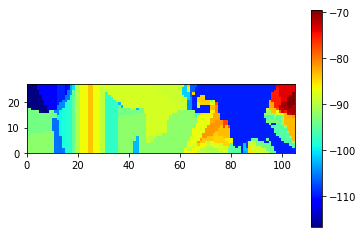

In [53]:
df_total = pd.read_csv('./zone_result/zone_predict_total.csv')  
df_total_sort = df_total.sort_values(by=['y','x'])
#print (df_total_sort)
rsrp_map_frompd = df_total_sort.values
print (rsrp_map_frompd)
print (len(rsrp_map_frompd))
rsrp_map_pd = (rsrp_map_frompd[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(rsrp_map_pd,cmap='jet',alpha=1)
plt.savefig('./result_rsrp/rsrp_map.png')
plt.colorbar()
#sns.heatmap(rsrp_map_pd, cmap = 'jet')
'''
df_merge_result.drop(['pci'])
df_merge_result_array = df_merge_result[1:,:].values
print(df_merge_result_array)
heatmap_rsrp = plt.pcolor(df_merge_result,cmap='jet',alpha=1)
'''


Merge to 51-5F map
===

In [ ]:
#bk = Image.open('5f_map.png')
bk = Image.open('823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./result_rsrp/rsrp_map.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
bk = bk.resize((432, 288))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('./result_rsrp/zone_rsrp.png')
